<a href="https://colab.research.google.com/github/LINEN0723/machine-learning/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets.cifar10 import load_data
(x_train,y_train),(x_test,y_test)=load_data()

In [ ]:
x_train.shape#3是元素


(50000, 32, 32, 3)

In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

圖片:  鹿


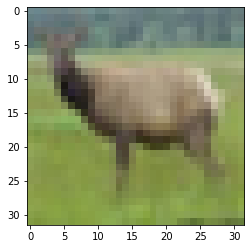

In [ ]:
ans = {0:"飛機", 1:"汽車", 2:"鳥", 3:"貓", 4:"鹿", 5:"狗", 6:"青蛙", 7:"馬", 8:"船", 9:"卡車"}
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 49999)
print("圖片: ", ans[y_train[c][0]])
plt.imshow(x_train[c])


In [ ]:
xx_train=x_train/255
xx_test = x_test/255


In [ ]:
from keras.utils.np_utils import to_categorical
yy_train = to_categorical(y_train)
yy_test = to_categorical(y_test)#處理成ONE HOT

In [ ]:
yy_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
cnn = Sequential()
from keras.layers import Conv2D
cnn.add(Conv2D(32, (3, 3),padding="same",activation="relu",input_shape=(32, 32, 3)))
# 因為分析的是2D的圖片，所以使用[Conv2D]
# Conv2D: 參數一: 過濾器數量(32)
#      参數二: 過濾器大小(3*3，一個tuple)
cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.layers import MaxPool2D
cnn.add(MaxPool2D())
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.layers.core.activation import Activation
cnn.add(Conv2D(64, (3, 3),padding="same",activation="relu"))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.add(MaxPool2D())
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.layers import Flatten#要變一維
cnn.add(Flatten())


In [ ]:
from keras.layers import Dense
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 256)              

nn.fit(xx_train,yy_train,batch_size=200,epochs=10,validation_split=0.1)

In [ ]:
cnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [ ]:
cnn.fit(xx_train,yy_train,batch_size=200,epochs=10,validation_split=0.1)#訓練

Epoch 1/10
225/225 [==============================] - 3s 12ms/step - loss: 1.5980 - accuracy: 0.4241 - val_loss: 1.3509 - val_accuracy: 0.5186
Epoch 2/10
225/225 [==============================] - 2s 10ms/step - loss: 1.2127 - accuracy: 0.5714 - val_loss: 1.1058 - val_accuracy: 0.6094
Epoch 3/10
225/225 [==============================] - 2s 8ms/step - loss: 1.0492 - accuracy: 0.6310 - val_loss: 1.0088 - val_accuracy: 0.6546
Epoch 4/10
225/225 [==============================] - 2s 8ms/step - loss: 0.9401 - accuracy: 0.6706 - val_loss: 0.9459 - val_accuracy: 0.6800
Epoch 5/10
225/225 [==============================] - 2s 8ms/step - loss: 0.8574 - accuracy: 0.7025 - val_loss: 0.8946 - val_accuracy: 0.6974
Epoch 6/10
225/225 [==============================] - 2s 8ms/step - loss: 0.7793 - accuracy: 0.7290 - val_loss: 0.8479 - val_accuracy: 0.7084
Epoch 7/10
225/225 [==============================] - 2s 8ms/step - loss: 0.7189 - accuracy: 0.7500 - val_loss: 0.8105 - val_accuracy: 0.7246
Epoc

In [ ]:
cnn.evaluate(xx_test, yy_test)#評估模型


313/313 [==============================] - 1s 3ms/step - loss: 0.8627 - accuracy: 0.7117


[0.8627313375473022, 0.7117000222206116]

In [ ]:
#改善模型績效的方法--Dropout
from keras.layers import Dropout
cnn.add(Dropout(0.3))


In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 256)              

In [ ]:
cnn.add(Dense(64,activation="relu"))

In [ ]:
cnn.add(Dense(10,activation="softmax"))
cnn.summary()
cnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
cnn.fit(xx_train,yy_train,batch_size=200,epochs=10,validation_split=0.1)
cnn.evaluate(xx_test,yy_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 256)              

[1.0379546880722046, 0.6887999773025513]

In [ ]:
cnn.save("cifar10_cnn.h5")